# **Batch Gradient Descent maths**

In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Manual Calculation Walkthrough: Multiple Linear Regression**

This document demonstrates one full iteration of Batch Gradient Descent for a dataset with 3 features.

1. The Dataset

We are predicting a Test Score based on three inputs.

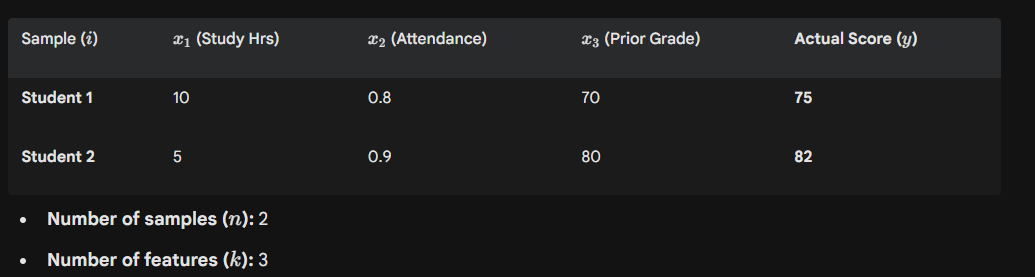

2. Initial Parameters & Hyperparameters
- We start with "placeholder" weights and a small learning rate.
- Weights ($w$): $m_1 = 0.1, \quad m_2 = 0.1, \quad m_3 = 0.1$
- Intercept ($b$): $0.0$
- Learning Rate ($\alpha$): $0.01$

3. Step 1: Forward Pass (Predictions)

We calculate the predicted score ($\hat{y}$) using:

$$\hat{y} = (m_1 \cdot x_1) + (m_2 \cdot x_2) + (m_3 \cdot x_3) + b$$
- Prediction 1 (row 1) ($\hat{y}_1$): $(0.1 \cdot 10) + (0.1 \cdot 0.8) + (0.1 \cdot 70) + 0 = 1.0 + 0.08 + 7.0 = \mathbf{8.08}$
- Prediction 2 (row 2) ($\hat{y}_2$): $(0.1 \cdot 5) + (0.1 \cdot 0.9) + (0.1 \cdot 80) + 0 = 0.5 + 0.09 + 8.0 = \mathbf{8.59}$

4. Step 2: Calculate Residuals (Errors)

The residual is the difference between what we predicted and the actual truth.


$$\text{Error} = \hat{y} - y$$

- Error 1 ($e_1$): $8.08 - 75 = \mathbf{-66.92}$
- Error 2 ($e_2$): $8.59 - 82 = \mathbf{-73.41}$

5. Step 3: Compute Gradients

The gradient tells us the "slope of the mountain." The formula for the gradient of a coefficient $m_j$ is:


$$\text{Grad}_{m_j} = \frac{2}{n} \sum (\text{Error} \cdot \text{Feature}_j)$$

A. Gradient for Intercept ($b$)

$$\text{Grad}_b = \frac{2}{2} (e_1 + e_2) = (-66.92) + (-73.41) = \mathbf{-140.33}$$

B. Gradient for $m_1$ (Study Hours)

$$\text{Grad}_{m_1} = \frac{2}{2} [(e_1 \cdot x_{1,1}) + (e_2 \cdot x_{2,1})]$$

$$\text{Grad}_{m_1} = [(-66.92 \cdot 10) + (-73.41 \cdot 5)] = -669.2 - 367.05 = \mathbf{-1036.25}$$

C. Gradient for $m_2$ (Attendance)

$$\text{Grad}_{m_2} = [(-66.92 \cdot 0.8) + (-73.41 \cdot 0.9)] = -53.536 - 66.069 = \mathbf{-119.605}$$

D. Gradient for $m_3$ (Prior Grade)

$$\text{Grad}_{m_3} = [(-66.92 \cdot 70) + (-73.41 \cdot 80)] = -4684.4 - 5872.8 = \mathbf{-10557.2}$$

6. Step 4: Update Parameters

Finally, we update our old weights to the new, slightly better weights using the update rule:


$$\text{Parameter}_{new} = \text{Parameter}_{old} - (\alpha \cdot \text{Gradient})$$

- New $b$: $0 - (0.01 \cdot -140.33) = \mathbf{1.403}$
- New $m_1$: $0.1 - (0.01 \cdot -1036.25) = \mathbf{10.46}$
- New $m_2$: $0.1 - (0.01 \cdot -119.605) = \mathbf{1.29}$
- New $m_3$: $0.1 - (0.01 \cdot -10557.2) = \mathbf{105.67}$



In [11]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

print(X.shape)
print(y.shape, '\n')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


reg = LinearRegression()
reg.fit(X_train,y_train)


print(reg.coef_, '\n')
print(reg.intercept_)




(442, 10)
(442,) 

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238] 

151.88331005254167


In [ ]:
class BatchGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        # Initialize coefficients (weights) and intercept (bias)
        # X_train.shape[1] is the number of features
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        m = X_train.shape[0] # Number of samples (n)
        
        for i in range(self.epochs):
            # 1. Calculate prediction: y_hat = Xw + b
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
           
            
            # 2. Calculate gradients using Partial Differentiation
            # Residual (Error) = (y - y_hat)
            residual = y_train - y_hat
            
            # Gradient for intercept (b): -(2/m) * np.sum(residual)
            intercept_der = -2 * np.mean(residual)
            
            # Gradient for coefficients (mj): -(2/m) * (X^T . residual)
            # Transposing X ensures (d, m) dot (m, 1) results in (d, 1)
            coef_der = (-2/m) * np.dot(X_train.T, residual)
            
            # 3. Update weights (Gradient Descent Step)
            # New = Old - (Learning Rate * Direction)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            self.coef_ = self.coef_ - (self.lr * coef_der)
            
        print(f"Final Intercept: {self.intercept_}")
        print(f"Final Coefficients: {self.coef_}")
    
    def predict(self, X_test):
        # Prediction for new data using learned parameters
        return np.dot(X_test, self.coef_) + self.intercept_


np.dot()

The Math: It follows the "Row times Column" rule. It takes a row of features, 
multiplies each feature by its corresponding weight ($m_1, m_2, ...$), 
and sums them up into a single prediction ($\hat{y}$) for that row.


In [13]:
# -(2/m) * np.sum(y_train - self.coef_*X_train.ravel() - self.intercept_)

In [14]:
# np.dot()

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 1*4 + 2*5 + 3*6 = 32

result = np.dot(a, b)
print(result)


32
